## Assignment

### Design a Decision Tree classifier for the iris dataset for flower species classification with attributes as sepal length, sepal width, petal length, and petal width

### 1. Import the Libraries

In [ ]:
# Load a sample dataset using sklearn
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### 2. Load the Datasets

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving iris.data to iris (5).data


In [ ]:
df = pd.read_csv('iris.data', header=None)
print(df.head())


     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [ ]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=column_names)


### 3. Binary encoding the target variable

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


df_encoded_train = pd.get_dummies(df_train.drop('class', axis=1))
df_encoded_test = pd.get_dummies(df_test.drop('class', axis=1))


df_encoded_test = df_encoded_test.reindex(columns=df_encoded_train.columns, fill_value=0)


df_encoded_train['class'] = df_train['class'].values
df_encoded_test['class'] = df_test['class'].values

print(df_encoded_train.head())
print(df_encoded_test.head())



    sepal_length  sepal_width  petal_length  petal_width            class
22           4.6          3.6           1.0          0.2      Iris-setosa
15           5.7          4.4           1.5          0.4      Iris-setosa
65           6.7          3.1           4.4          1.4  Iris-versicolor
11           4.8          3.4           1.6          0.2      Iris-setosa
42           4.4          3.2           1.3          0.2      Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width            class
73            6.1          2.8           4.7          1.2  Iris-versicolor
18            5.7          3.8           1.7          0.3      Iris-setosa
118           7.7          2.6           6.9          2.3   Iris-virginica
78            6.0          2.9           4.5          1.5  Iris-versicolor
76            6.8          2.8           4.8          1.4  Iris-versicolor


### 4. Splitting the Datasets into Train and Test set

In [ ]:
# Train set
X_train = df_encoded_train.drop('class', axis=1)
y_train = df_encoded_train['class']

# Test set
X_test = df_encoded_test.drop('class', axis=1)
y_test = df_encoded_test['class']


### 5. Train the Classifier

In [ ]:



clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

### 6. Predict and evalaute the model

In [ ]:


y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 7. Evaluate the Model

In [ ]:



X = df.drop('class', axis=1)
y = df['class']

scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean accuracy: 0.9533333333333334


### 8. Visualizing the Decision Tree

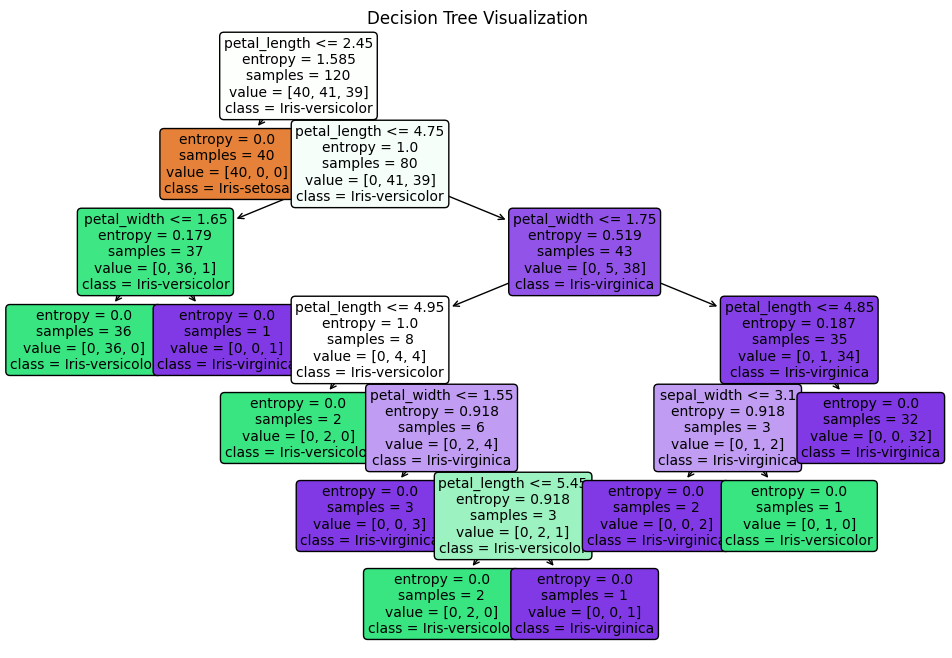

In [ ]:
# Visualize the trained Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf,
               feature_names=X_train.columns,
               class_names=clf.classes_,
               filled=True,
               rounded=True,
               fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()
